<a href="https://colab.research.google.com/github/diplav09/Datamining/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.io import loadmat
import os
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.environ['SIR_CONFIG_DIR'] = "/content/gdrive/My Drive/"
%cd /content/gdrive/My Drive/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


In [2]:
cd Large_Scale_data_mining/Project1/

/content/gdrive/My Drive/Large_Scale_data_mining/Project1


In [3]:
import pandas as pd

In [4]:
fname = 'Project_1_dataset_01_01_2022.csv'
df = pd.read_csv (fname)

**EDA**

In [5]:
df.head(5)

,Unnamed: 0,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,590,Having made a massive impact in Saudi Arabia w...,Having made a massive impact in Saudi Arabia w...,"['singhs', 'rooting', 'cool', 'saudi', 'style'...",NaN,[],https://www.msn.com/en-in/entertainment/other/...,cricket,sports
1,388,Cricket is all about the emotional rollercoast...,"No matter which team fans hope to win, every s...","['wants', 'fans', 'finals', 'cup', 'win', 'tou...",NaN,[],https://www.prnewswire.com:443/news-releases/c...,cricket,sports
2,423,New Zealand announces back-to-back tours next ...,New Zealand announces back-to-back tours next ...,"['test', 'west', 'tour', 'zealand', 'world', '...",2021-12-20 00:00:00,[],https://www.aljazeera.com/news/2021/12/20/cric...,cricket,sports
3,563,It's not the first time cricket fans in the co...,Billed as one of the pre-tournament favourites...,"['qualify', 'afghanistan', 'cup', 'world', 'ze...",NaN,[],https://www.msn.com/en-in/news/other/t20-world...,cricket,sports
4,634,An employee works on a computer terminal again...,"REUTERS/Sivaram VBENGALURU, Oct 11 (Reuters Br...","['success', 'tech', 'startup', 'talent', 'onli...",2021-10-11 00:00:00,['Una Galani'],https://www.reuters.com/breakingviews/india-in...,cricket,sports


In [6]:
num_sports_article = len(df.loc[df.root_label == 'sports'])
print("# article with root label == sports =", num_sports_article)
num_climate_article = len(df.loc[df.root_label == 'climate'])
print("# article with root label == climate =", num_climate_article)
print("# total article = ",len(df))

# article with root label == sports = 1036
# article with root label == climate = 1036
# total article =  2072


In [ ]:
# label encoder 
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# data['Category']=le.fit_transform(data['Category'])
# data.head()

In [ ]:
FT = df.full_text

In [ ]:
FT.head()

0    Having made a massive impact in Saudi Arabia w...
1    Cricket is all about the emotional rollercoast...
2    New Zealand announces back-to-back tours next ...
3    It's not the first time cricket fans in the co...
4    An employee works on a computer terminal again...
Name: full_text, dtype: object

In [ ]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
histo = []
for i in range(0,len(FT)):
    review = re.sub(r'https?://\S+|www.\S+', '', FT[i])
    review = re.sub(r'<.*?>', '', review)
    review = re.sub(r'[^a-z0-9A-Z]+', ' ', review)
    if(i==0):
        print(review)
    histo.append(len(review))

Having made a massive impact in Saudi Arabia with his style and performance in 83 Ranveer Singh returned to Mumbai on Friday morning with Deepika Padukone After a few hours Ranveer was once again spotted at Mumbai airport as he was leaving the city This time when Ranveer showed up at the airport his stylish look certainly grabbed all the attention The 83 star is already known for his offbeat and unique sartorial choices and he proved it once again As Ranveer stepped out of his luxury vehicle he left everyone in awe with his cool and comfy style The paparazzi caught up with him and clicked him in the frame In the photos Ranveer is seen clad in a Drew House white hoodie with pants But what actually caught all the attention was his hot pink beanie matching his shoes Ranveer slayed the hot pink shoes and beanie like a pro with a cool and comfy look His yellow scarf and cool shades added another level of charm to the airport look Take a look Provided by Pinkvilla Provided by Pinkvilla Provi

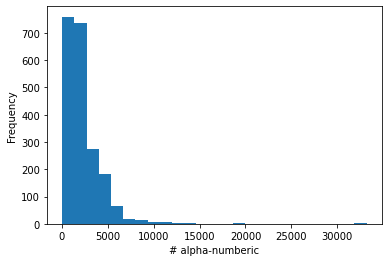

In [ ]:
plt.hist(hist, density=False, bins=25)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('# alpha-numberic');

In [ ]:
print(len(hist))

2072


#Binary Classification

In [7]:
import numpy as np
import random
np.random.seed(42)
random.seed(42)

train test split

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df[["full_text","root_label"]], test_size=0.2)

In [9]:
print("train set size  = ",len(train))
print("test set size  = ",len(test))

train set size  =  1657
test set size  =  415


Define Stopwords

In [10]:
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
nltk.download('stopwords' )
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
stop_words_en = stopwords.words('english')
from string import punctuation
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Feature Extraction

In [11]:
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

In [17]:
import re
from nltk import pos_tag
wnl = nltk.wordnet.WordNetLemmatizer()
def clean(text):
        text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        texter = re.sub(r"<br />", " ", text)
        texter = re.sub(r"&quot;", "\"",texter)
        texter = re.sub('&#39;', "\"", texter)
        # texter = re.sub(r'[0-9]', '', texter)  #to remove digits
        texter = re.sub('\n', " ", texter)
        texter = re.sub(' u '," you ", texter)
        texter = re.sub('`',"", texter)
        texter = re.sub(' +', ' ', texter)
        texter = re.sub(r"(!)\1+", r"!", texter)
        texter = re.sub(r"(\?)\1+", r"?", texter)
        texter = re.sub('&amp;', 'and', texter)
        texter = re.sub('\r', ' ',texter)
        clean = re.compile('<.*?>')
        texter = texter.encode('ascii', 'ignore').decode('ascii')
        texter = re.sub(clean, '', texter)
        # texter = re.sub(r'[^a-zA-Z]+', ' ', texter) #only consider alphabets removed punctuation also can be a issue
        texter = texter.lower()
        # lemmatization with stop word removal
        # texter = [wnl.lemmatize(word, pos=penn2morphy(tag)) 
        #     for word, tag in pos_tag(nltk.word_tokenize(texter)) if not word in combined_stopwords]
        # texter=' '.join(texter)

        if texter == "":
            texter = ""
        return texter

In [18]:
def lemmatization_and_stopword(dataset):
    print(len(dataset.full_text))
    for i in dataset.full_text.keys():
        dataset.full_text[i] = clean(dataset.full_text[i])
    return dataset

In [19]:
train = lemmatization_and_stopword(train)
test = lemmatization_and_stopword(test)

1657
415


count vector

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))
def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())
def lemmatize_sent(list_word): 
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

In [31]:
count_vect1 = CountVectorizer(min_df=3,analyzer=stem_rmv_punc)
X_train_counts = count_vect1.fit_transform(train.full_text)

In [32]:
X_test_counts = count_vect1.transform(test.full_text)

Tf-idf

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

Convert root labels into numeric form

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y_train =le.fit_transform(train.root_label)
Y_test = le.transform(test.root_label)

In [35]:
print(train.root_label[0],Y_train[0])

sports 0


Dimensionality Reduction

In [88]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=50, init='random', random_state=42)
W_train_nmf = nmf.fit_transform(X_train_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [89]:
print("Reconstruction error in NMF = ",nmf.reconstruction_err_)

Reconstruction error in NMF =  34.368173401018474


In [117]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)

In [118]:
W_train_svd = svd.fit_transform(X_train_tfidf)

In [119]:
svd.explained_variance_ratio_

array([0.00539039, 0.02000825, 0.019249  , 0.01560421, 0.0131025 ,
       0.01228693, 0.01041722, 0.00970967, 0.00880077, 0.00883258,
       0.00819134, 0.00733393, 0.0072292 , 0.00702135, 0.00558609,
       0.00532393, 0.00486275, 0.00461055, 0.00445977, 0.00431718,
       0.00426225, 0.00407942, 0.00403631, 0.00395068, 0.00385965,
       0.0037861 , 0.00376187, 0.00370692, 0.00359213, 0.00342742,
       0.00335322, 0.00326513, 0.00324261, 0.00309276, 0.00304501,
       0.00298689, 0.00295238, 0.00286568, 0.0028159 , 0.00275558,
       0.00272397, 0.00270032, 0.00265257, 0.0025996 , 0.00256048,
       0.0024783 , 0.00238913, 0.00237346, 0.0023674 , 0.00232802])

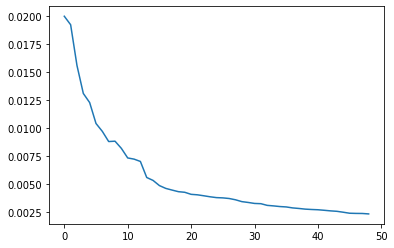

In [120]:
import matplotlib.pyplot as plt
plt.plot(svd.explained_variance_ratio_[1:]) 
plt.show()

In [121]:
X_train_recons = svd.inverse_transform(W_train_svd)

In [123]:
print("Reconstruction error in SVD = ",np.linalg.norm(X_train_tfidf-X_train_recons))

Reconstruction error in SVD =  34.0652556579666


#Classification Algorithm

SVM report (accuracy, recall, precision and F-1 score)
<br>Doubt ?? hard svm make number of iteration to higher number 

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

In [ ]:
# prob_score = pipe.predict_proba(test_data)

# fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

In [52]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=10, n_iter=7, random_state=42)
W_train_svd = svd.fit_transform(X_train_tfidf)
W_test_svd = svd.transform(X_test_tfidf)

In [48]:
W_train_svd[0]

array([ 0.17757321,  0.02030553,  0.00655751,  0.02866301, -0.06249099,
       -0.01633809, -0.0542531 ,  0.01434009, -0.00611295,  0.00950024])

In [59]:
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB().fit(W_train, twenty_train.target)
# predicted = clf.predict(W_test)
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
hard_svm = LinearSVC(C=1000,max_iter=120000)
hard_svm.fit(W_train_svd,Y_train)

LinearSVC(C=1000, max_iter=120000)

In [60]:
predicted = hard_svm.predict(W_test_svd)

In [69]:
print("accuracy = ",accuracy_score(Y_test, predicted)," precision = ",precision_score(Y_test, predicted), " recall = ",recall_score(Y_test, predicted))

accuracy =  0.9542168674698795  precision =  0.9439252336448598  recall =  0.9665071770334929


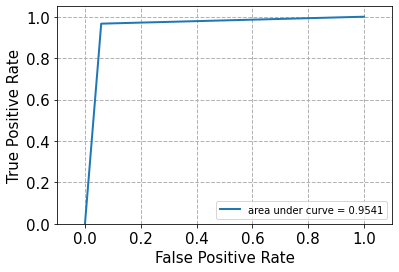

In [65]:
fpr, tpr, _ = roc_curve(Y_test, predicted)
plot_roc(fpr, tpr)

In [66]:
soft_svm = LinearSVC(C=0.0001,max_iter=120000)
soft_svm.fit(W_train_svd,Y_train)
predicted_soft = soft_svm.predict(W_test_svd)

In [70]:
print("accuracy = ",accuracy_score(Y_test, predicted_soft)," precision = ",precision_score(Y_test, predicted_soft), " recall = ",recall_score(Y_test, predicted_soft))

accuracy =  0.9349397590361446  precision =  0.955  recall =  0.9138755980861244


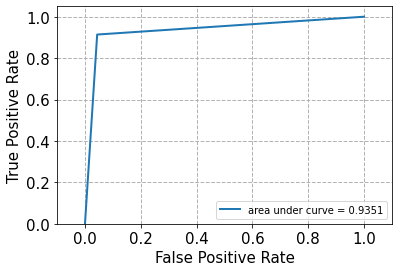

In [67]:
fpr, tpr, _ = roc_curve(Y_test, predicted_soft)
plot_roc(fpr, tpr)

In [73]:
hard_svm2 = LinearSVC(C=100000,max_iter=12000000)
hard_svm2.fit(W_train_svd,Y_train)

LinearSVC(C=100000, max_iter=12000000)

In [74]:
predicted_hard2 = hard_svm2.predict(W_test_svd)

In [75]:
print("accuracy = ",accuracy_score(Y_test, predicted_hard2)," precision = ",precision_score(Y_test, predicted_hard2), " recall = ",recall_score(Y_test, predicted_hard2))

accuracy =  0.9542168674698795  precision =  0.9439252336448598  recall =  0.9665071770334929


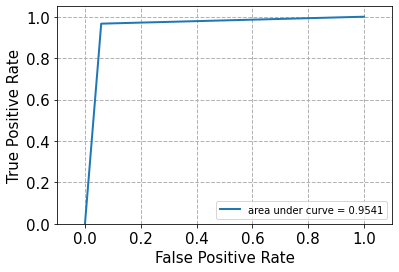

In [76]:
fpr, tpr, _ = roc_curve(Y_test, predicted_hard2)
plot_roc(fpr, tpr)

Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='none',random_state=42)
logreg.fit(W_train_svd,Y_train)

LogisticRegression(penalty='none', random_state=42)

In [78]:
predicted_logreg = logreg.predict(W_test_svd)

In [79]:
print("accuracy = ",accuracy_score(Y_test, predicted_logreg)," precision = ",precision_score(Y_test, predicted_logreg), " recall = ",recall_score(Y_test, predicted_logreg))

accuracy =  0.9518072289156626  precision =  0.9395348837209302  recall =  0.9665071770334929


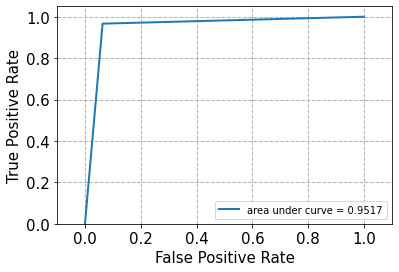

In [80]:
fpr, tpr, _ = roc_curve(Y_test, predicted_logreg)
plot_roc(fpr, tpr)

L2 regularization Ridge Regression

In [95]:
logregl2 = LogisticRegression(penalty='l2',random_state=42,C=100)
logregl2.fit(W_train_svd,Y_train)

LogisticRegression(C=100, random_state=42)

In [96]:
predicted_logregl2 = logregl2.predict(W_test_svd)

In [97]:
print("accuracy = ",accuracy_score(Y_test, predicted_logregl2)," precision = ",precision_score(Y_test, predicted_logregl2), " recall = ",recall_score(Y_test, predicted_logregl2))

accuracy =  0.9542168674698795  precision =  0.9481132075471698  recall =  0.9617224880382775


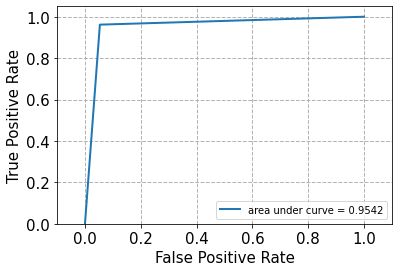

In [98]:
fpr, tpr, _ = roc_curve(Y_test, predicted_logregl2)
plot_roc(fpr, tpr)

L1 regularization Lasso Regression

In [113]:
logregl1 = LogisticRegression(penalty='l1',random_state=42,C=10, solver='liblinear')
logregl1.fit(W_train_svd,Y_train)

LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')

In [114]:
predicted_logregl1 = logregl1.predict(W_test_svd)

In [115]:
print("accuracy = ",accuracy_score(Y_test, predicted_logregl1)," precision = ",precision_score(Y_test, predicted_logregl1), " recall = ",recall_score(Y_test, predicted_logregl1))

accuracy =  0.9542168674698795  precision =  0.9481132075471698  recall =  0.9617224880382775


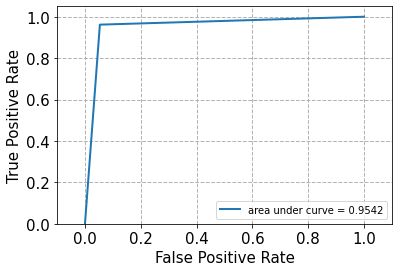

In [116]:
fpr, tpr, _ = roc_curve(Y_test, predicted_logregl1)
plot_roc(fpr, tpr)

Naive Bayes Model

In [117]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(W_train_svd,Y_train)

GaussianNB()

In [118]:
predicted_gnb = gnb.predict(W_test_svd)

In [119]:
print("accuracy = ",accuracy_score(Y_test, predicted_gnb)," precision = ",precision_score(Y_test, predicted_gnb), " recall = ",recall_score(Y_test, predicted_gnb))

accuracy =  0.9228915662650602  precision =  0.8933333333333333  recall =  0.9617224880382775


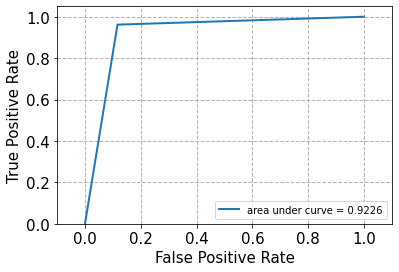

In [120]:
fpr, tpr, _ = roc_curve(Y_test, predicted_gnb)
plot_roc(fpr, tpr)